In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pyam

<IPython.core.display.Javascript object>

In [2]:
data = pd.DataFrame([
    ['m1', 's1', 'r', 'v', 'u', 1, 1.4, 2.15, 3.15, 4.3, 5.2],
    ['m1', 's2', 'r', 'v', 'u', 1, 1.3, 2.0, 2.95, 4.0, 4.8],
    ['m1', 's3', 'r', 'v', 'u', 1, 1.2, 1.85, 2.75, 3.7, 4.3],
    ['m2', 's1', 'r', 'v', 'u', 1, 1.35, 2.0, 2.8, 3.6, 4.0],
    ['m2', 's2', 'r', 'v', 'u', 1, 1.25, 1.75, 2.5, 3.3, 3.7],
    ['m2', 's3', 'r', 'v', 'u', 1, 1.15, 1.5, 2.1, 2.9, 3.3],
    ['m3', 's1', 'r', 'v', 'u', 1, 1.30, 1.6, 2.25, 2.8, 3.1],
    ['m3', 's2', 'r', 'v', 'u', 1, 1.15, 1.45, 1.95, 2.4, 2.6],
    ['m3', 's3', 'r', 'v', 'u', 1, 1.18, 1.35, 1.65, 1.9, 2.1],
    ['m4', 's1', 'r', 'v', 'u', 1, 1.28, 1.55, 1.75, 1.9, 2.0],
    ['m4', 's2', 'r', 'v', 'u', 1, 1.20, 1.4, 1.6, 1.7, 1.75],
    ['m4', 's3', 'r', 'v', 'u', 1, 1.15, 1.3, 1.45, 1.52, 1.5],
], columns=pyam.IAMC_IDX + [0, 10, 20, 30, 40, 50]).set_index(pyam.IAMC_IDX)

In [3]:
data_interpolated = pd.DataFrame(interp1d(np.linspace(0, 50, num=6, endpoint=True),
                                          data, kind='cubic')(np.linspace(0, 50, num=51)))
data_interpolated.index = data.index

In [4]:
df = pyam.IamDataFrame(data_interpolated)

In [5]:
pyam.run_control().update(dict(color=dict(model=dict(
    m1="xkcd:red",
    m2="xkcd:orange",
    m3="xkcd:medium green",
    m4="xkcd:bluish"
))))

[]

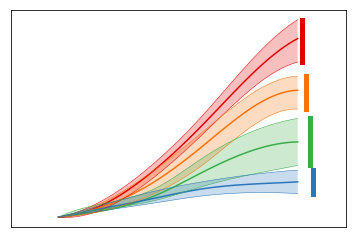

In [6]:
fig, ax = plt.subplots()
df.filter(scenario='s2').line_plot(ax=ax, color='model', legend=False)
df.filter(scenario='s2', keep=False).line_plot(ax=ax, linewidth=0.5, color='model', legend=False)
df.line_plot(ax=ax, alpha=0, color='model', fill_between=True, final_ranges=dict(linewidth=5), legend=False)
ax.set_title('')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticks([])
ax.set_yticks([])